In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/My Drive/Google Colab/advGAN')
print(os.getcwd())

/content/drive/My Drive/Google Colab/advGAN


In [ ]:
!python3 train_target_model.py

CUDA Available:  True
Files already downloaded and verified
loss in epoch 0: 430.325439
loss in epoch 1: 278.189850
loss in epoch 2: 217.955124
loss in epoch 3: 175.597000
loss in epoch 4: 144.869720
loss in epoch 5: 120.168694
loss in epoch 6: 100.718544
loss in epoch 7: 84.640106
loss in epoch 8: 72.140648
loss in epoch 9: 59.715775
loss in epoch 10: 47.805859
loss in epoch 11: 41.263279
loss in epoch 12: 34.017174
loss in epoch 13: 28.137604
loss in epoch 14: 21.965025
loss in epoch 15: 19.185545
loss in epoch 16: 13.974408
loss in epoch 17: 12.018658
loss in epoch 18: 10.566796
loss in epoch 19: 12.185560
loss in epoch 20: 4.265120
loss in epoch 21: 0.557247
loss in epoch 22: 0.194290
loss in epoch 23: 0.117651
loss in epoch 24: 0.078193
loss in epoch 25: 0.049165
loss in epoch 26: 0.026152
loss in epoch 27: 0.015006
loss in epoch 28: 0.010101
loss in epoch 29: 0.008382
loss in epoch 30: 0.003626
loss in epoch 31: 0.001980
loss in epoch 32: 0.001537
loss in epoch 33: 0.001202
loss 

In [ ]:
!python3 main.py

CUDA Available:  True
Files already downloaded and verified
epoch 1:
loss_D: 0.285, loss_G_fake: 0.442,             
loss_perturb: 13.634, loss_adv: 12.999, 

epoch 2:
loss_D: 0.076, loss_G_fake: 0.764,             
loss_perturb: 11.482, loss_adv: 12.842, 

epoch 3:
loss_D: 0.039, loss_G_fake: 0.830,             
loss_perturb: 12.233, loss_adv: 12.857, 

epoch 4:
loss_D: 0.015, loss_G_fake: 0.889,             
loss_perturb: 10.954, loss_adv: 12.866, 

epoch 5:
loss_D: 0.013, loss_G_fake: 0.908,             
loss_perturb: 9.506, loss_adv: 12.862, 

epoch 6:
loss_D: 0.002, loss_G_fake: 0.955,             
loss_perturb: 9.012, loss_adv: 12.852, 

epoch 7:
loss_D: 0.005, loss_G_fake: 0.948,             
loss_perturb: 10.098, loss_adv: 12.854, 

epoch 8:
loss_D: 0.002, loss_G_fake: 0.965,             
loss_perturb: 9.631, loss_adv: 12.820, 

epoch 9:
loss_D: 0.003, loss_G_fake: 0.962,             
loss_perturb: 8.382, loss_adv: 12.884, 

epoch 10:
loss_D: 0.001, loss_G_fake: 0.976,         

In [ ]:
!python3 test_adversarial_examples.py

CUDA Available:  True
Files already downloaded and verified
MNIST training dataset:
num_correct:  3216
accuracy of adv imgs in training set: 0.064320

Files already downloaded and verified
num_correct:  717
accuracy of adv imgs in testing set: 0.071700



In [ ]:
print(3216/0.064320)
print(717/0.071700)

50000.0
10000.0


In [5]:
def show(imgs, labels, adv_imgs, pred_labels, perturbations):
    labels_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    for i, (img, label, adv_img, pred_label, perturbation) in enumerate(zip(imgs, labels, adv_imgs, pred_labels, perturbations)):
        plt.figure(figsize=(12, 4))

        plt.subplot(1,3,1)
        plt.title(labels_name[label.item()])
        plt.imshow(img.numpy().transpose(1,2,0))
        # plt.imshow(img.numpy().reshape((28,28)), cmap='gray')

        plt.subplot(1,3,2)
        plt.title(labels_name[pred_label.item()])
        plt.imshow(adv_img.numpy().transpose(1,2,0))
        # plt.imshow(adv_img.numpy().reshape((28,28)), cmap='gray')

        plt.subplot(1,3,3)
        plt.title('perturbation')
        plt.imshow(perturbation.numpy().transpose(1,2,0))
        # plt.imshow(perturbation.numpy().reshape((28,28)), cmap='gray')

        plt.show()

CUDA Available:  True
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


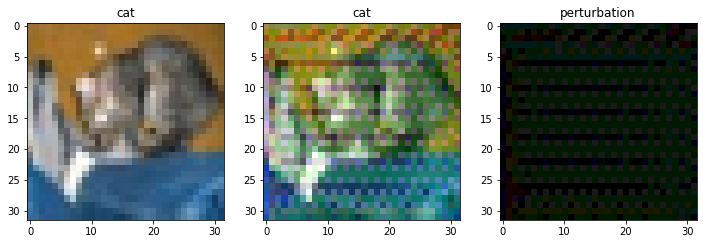

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


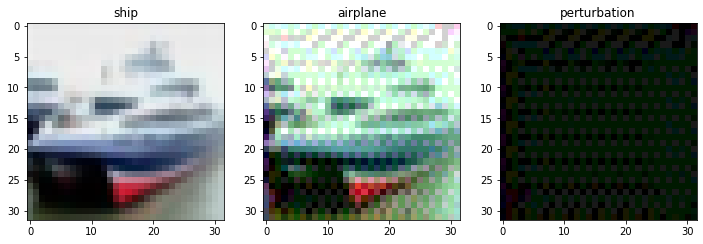

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


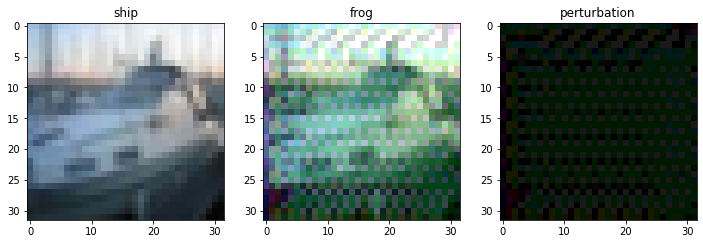

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


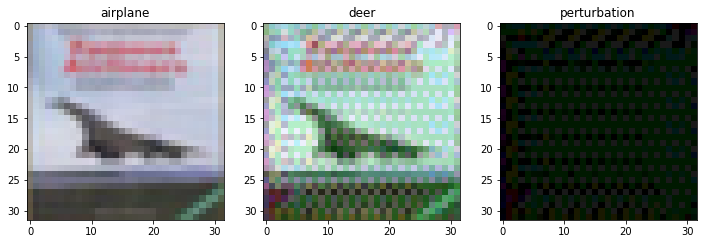

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


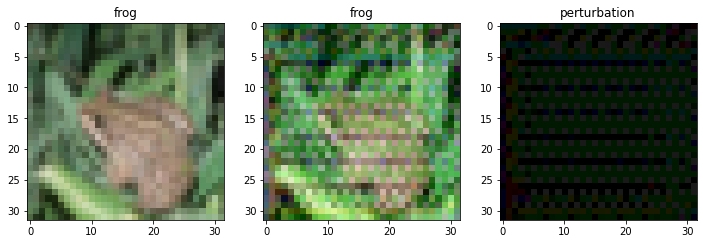

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


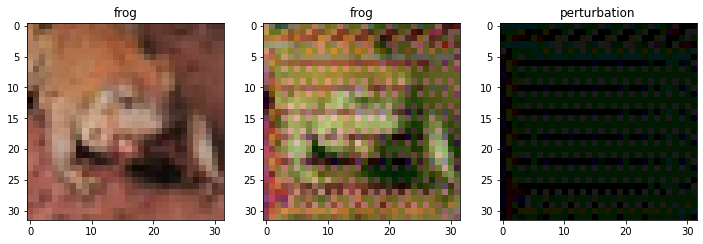

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


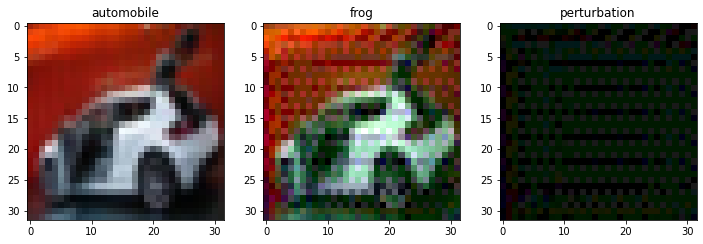

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


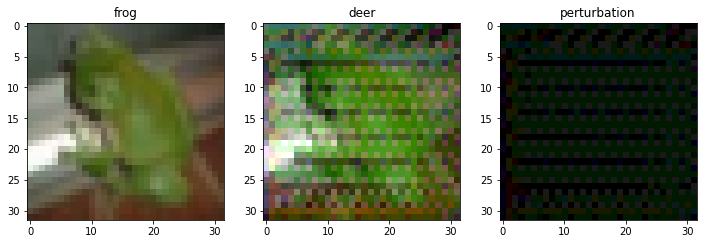

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


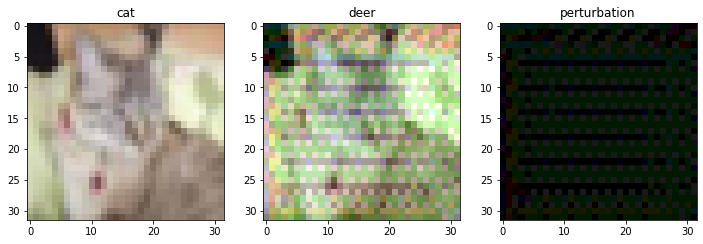

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


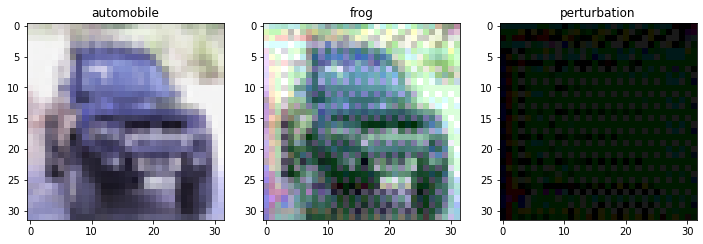

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


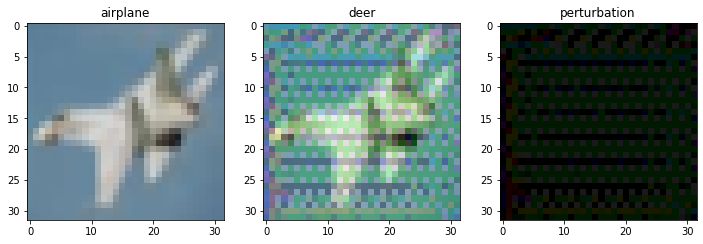

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


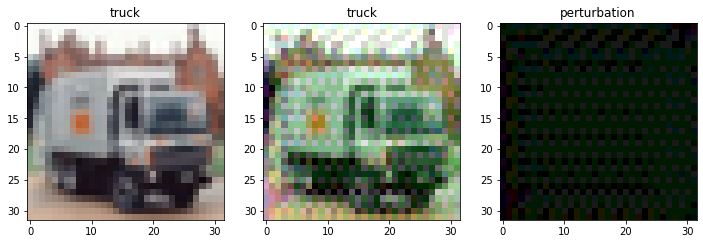

In [11]:
import torch
import torchvision.datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import models
from models import PreActResNet18
import matplotlib.pyplot as plt
# %matplotlib inline

use_cuda=True
image_nc=3
batch_size = 12

gen_input_nc = image_nc

# Define what device we are using
print("CUDA Available: ",torch.cuda.is_available())
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# load the pretrained model
pretrained_model = "./PreActResNet18.pth"
target_model = PreActResNet18().to(device)
target_model.load_state_dict(torch.load(pretrained_model))
target_model.eval()

# load the generator of adversarial examples
pretrained_generator_path = './models/netG_epoch_60.pth'
pretrained_G = models.Generator(gen_input_nc, image_nc).to(device)
pretrained_G.load_state_dict(torch.load(pretrained_generator_path))
pretrained_G.eval()

# test adversarial examples in MNIST testing dataset
mnist_dataset_test = torchvision.datasets.CIFAR10('./dataset', train=False, transform=transforms.ToTensor(), download=True)
test_dataloader = DataLoader(mnist_dataset_test, batch_size=batch_size, shuffle=False, num_workers=1)

for i, data in enumerate(test_dataloader, 0):
    test_img, test_label = data
    test_img, test_label = test_img.to(device), test_label.to(device)
    perturbation = pretrained_G(test_img)
    perturbation = torch.clamp(perturbation, -0.1, 0.1)
    adv_img = perturbation + test_img
    adv_img = torch.clamp(adv_img, 0, 1)
    pred_lab = torch.argmax(target_model(adv_img),1)
    show(test_img.cpu().detach(), test_label.cpu().detach(), adv_img.cpu().detach(), pred_lab.cpu().detach(), perturbation.cpu().detach())
    break